https://github.com/ogrisel/sklearn_pycon2014/blob/master/notebooks/05_unsupervised_in_depth.ipynb

# Unsupervised Learning for PCA and K-Means

Topics Covered:
    - Describing PCA for dimensionality reduction
    - Describing how K-means define clusters

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import random

(100, 5)


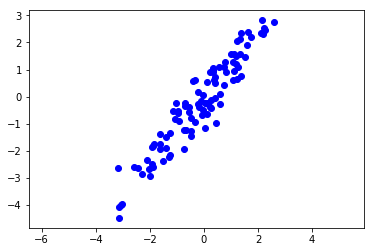

In [45]:
np.random.seed(0)
X = np.dot(np.random.random(size = (5,5)),    # Take Dot Product of 2 Arrays
           np.random.normal(size = (5,100))).T # Draw Random Samples From Gaussian Distribution (100 Rows, 5 Columns)

# Take Dot Product of 2 Arrays (5 x 5 Array and 5 x n Array to Create a 5 x n Array)
# Creating 5 Dimensional Data (x1, x2, x3, x4, x5) With 100 Points

plt.plot(X[:, 0], X[:, 1], 'ob')
plt.axis('equal')


"""Creating 5 Dimensional Data With 100 Points"""
print(X.shape)

https://strata.uga.edu/software/pdf/pcaTutorial.pdf

PCA Finds Principal Axes in the Data to Explain the Variance of the Data Distribution
- Passes A Vector (Axis) Through the Centroid Points of the Data
- Replots Data Coordinates Onto a Smaller Coordinate Model to Measure Variance of Each Axes
- Dimensionality Reduction Involves Taking Many Variables and Creating Only 2 or 3 Meaningful Axes
- Pca Produces Linear Combinations Of The Original Variables To Generate The Axes, Also Known As Principal Components, Or PCs

In [72]:
from sklearn.decomposition import PCA
#n_components Determines How Many Components(Features) to Keep (2/3 Best for Visualization?)
pca = PCA(n_components=5) 


pca.fit(X)
print("Variance of 1st, 2nd, 3rd,... Feature(s), Data:")
print(pca.explained_variance_)
print("Vector (Components) of Each Line:")
print(pca.components_)


Variance of 1st, 2nd, 3rd,... Feature(s), Data:
[  1.08489454e+01   1.12943882e+00   1.52678279e-01   1.66742058e-02
   2.38816509e-03]
Vector (Components) of Each Line:
[[-0.40764616 -0.50887036 -0.44358254 -0.40655008 -0.4613319 ]
 [ 0.04492747 -0.11991404  0.30139728 -0.79796448  0.50597876]
 [-0.79449094  0.31607736  0.50015299  0.01014932 -0.13646694]
 [ 0.31178022  0.63915966 -0.04827662 -0.44202943 -0.54456164]
 [ 0.32153284 -0.46716336  0.67816706  0.04976636 -0.46474484]]


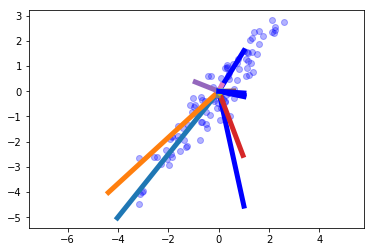

In [49]:
"""Test Plot"""

plt.plot(X[:, 0], X[:, 1], 'ob', alpha=0.3)
plt.axis('equal')
for line_length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(line_length) 
# Create a Vector Passing Through the Data ()
    plt.plot([0, v[0]], [0, v[1]], [0, v[2]], [0, v[3]], [0, v[4]], '-b', linewidth = 5)
    
# 5 Axes Intersecting At Centroid Point

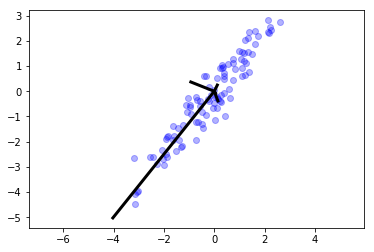

In [5]:
# Plot Two Vectors...?

plt.plot(X[:, 0], X[:, 1], 'ob', alpha=0.3)
plt.axis('equal')
for line_length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(line_length) 
# Create a Vector Passing Through the Data ()
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
    
# 5 Axes Intersecting At Centroid Point

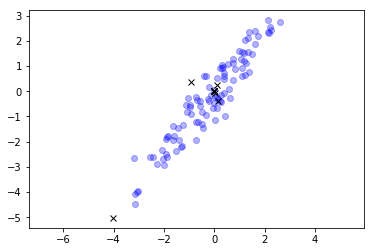

In [6]:
plt.plot(X[:, 0], X[:, 1], 'ob', alpha=0.3)
plt.axis('equal')
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length) # Create a Vector Passing Through the Data (Change 5 to Length)
    plt.plot([0, v[0]], [0, v[1]], 'xk', lw=3)
    
# 5 Axes Intersecting At Centroid Point

In [7]:
clf = PCA(0.95)
# Keepts 95% of the Variance and Tosses the other 5% Variance away 
transform_X = clf.fit_transform(X)
print(X.shape)
print(transform_X.shape)

# clf.fit_transform(X) - Reduces the dimensions of the data

(100, 5)
(100, 2)


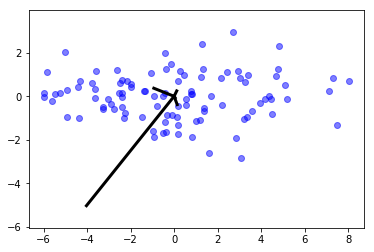

In [8]:
plt.plot(transform_X[:, 0], transform_X[:, 1], 'ob', alpha=0.5)
plt.axis('equal')
for line_length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(line_length) 
# Create a Vector Passing Through the Data (Change 5 to Length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
    
    
# 5 Axes Intersecting At Centroid Point

In [9]:
print(v) # Where the Vector Points Meets the Centroid Point

[ 0.04713883 -0.06848922  0.09942375  0.00729608 -0.06813465]


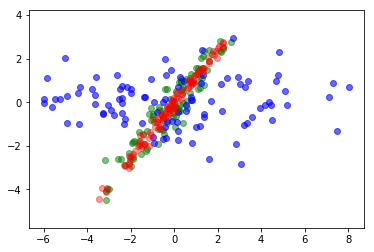

In [10]:
compress_X = clf.inverse_transform(transform_X)
plt.plot(X[:, 0], X[:, 1], 'og', alpha=0.5) 
plt.plot(transform_X[:, 0], transform_X[:, 1], 'ob', alpha=0.6)
plt.plot(compress_X[:, 0], compress_X[:, 1], 'or', alpha=0.4) 
plt.axis('equal');

# In Red, Throwing 5% of the Variance Away Compresses the Data by Almost Half and Keeping Only Important Features of the Data
# Green POints are the Original Data

# Green - Original Points
# Blue - Transformed Points
# Red - Compressed Points

In [11]:
print(X[0:5]) # First 5 Rows of Original Data

[[ 0.03916602 -1.15225925 -1.57183896 -0.29660155 -1.11333298]
 [ 1.36106284  0.76717103  0.58580359  0.70078551  1.14159274]
 [ 1.26360648  1.10692952  0.92999064  1.17528278  1.19189911]
 [ 0.72731439  0.43989154 -0.21345641  1.14520673  0.0591601 ]
 [-1.42230033 -1.4761613  -2.08324286  0.13521268 -2.56464796]]


In [12]:
print(transform_X[0:5]) # First 5 Rows of Transformed Data

[[ 1.36362625 -0.66062927]
 [-2.55483062  0.16396623]
 [-3.05678613 -0.13059502]
 [-1.45672365 -0.96847614]
 [ 2.84504519 -1.92049158]]


In [13]:
print(compress_X[0:5]) # First 5 Rows of Newly Compressed Data

[[-0.77945783 -0.89587924 -1.06839171 -0.24659852 -1.20091517]
 [ 0.85493307  0.99922676  0.91829817  0.6884525   1.0240218 ]
 [ 1.04631942  1.28997907  1.05217691  1.12757197  1.10654816]
 [ 0.35641621  0.57622841  0.08988205  1.14566582 -0.05556176]
 [-1.43995501 -1.49865425 -2.10524235  0.15645587 -2.52180455]]


In [14]:
from sklearn.datasets import load_digits
digits = load_digits()
data = digits.data
target = digits.target

In [15]:
# Reduce to Two Components of the 64-Component Dataset
reduce_components = PCA(2)  
reduced_data = reduce_components.fit_transform(data)
print(data.shape)
print(reduced_data.shape)

(1797, 64)
(1797, 2)


In [16]:
print(data[0:3])

[[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.
    5.   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.
    0.   8.   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.
   11.   0.   1.  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.
    0.   0.   6.  13.  10.   0.   0.   0.]
 [  0.   0.   0.  12.  13.   5.   0.   0.   0.   0.   0.  11.  16.   9.
    0.   0.   0.   0.   3.  15.  16.   6.   0.   0.   0.   7.  15.  16.
   16.   2.   0.   0.   0.   0.   1.  16.  16.   3.   0.   0.   0.   0.
    1.  16.  16.   6.   0.   0.   0.   0.   1.  16.  16.   6.   0.   0.
    0.   0.   0.  11.  16.  10.   0.   0.]
 [  0.   0.   0.   4.  15.  12.   0.   0.   0.   0.   3.  16.  15.  14.
    0.   0.   0.   0.   8.  13.   8.  16.   0.   0.   0.   0.   1.   6.
   15.  11.   0.   0.   0.   1.   8.  13.  15.   1.   0.   0.   0.   9.
   16.  16.   5.   0.   0.   0.   0.   3.  13.  16.  16.  11.   5.   0.
    0.   0.   0.   3.  11.  16.   9.   0.]]


In [17]:
print(reduced_data[0:3])

[[ -1.25946624  21.2748809 ]
 [  7.95761206 -20.76869877]
 [  6.99192099  -9.95598641]]


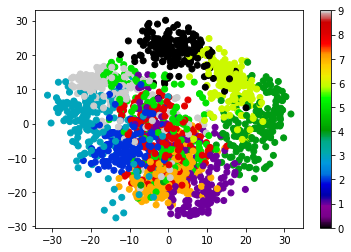

In [18]:
plt.scatter(reduced_data[:,0],reduced_data[:,1], c = target, cmap = cm.nipy_spectral)
plt.colorbar()

- This Graph Demonstrates How Many Components We Need To Retain A High Variance(90%). Looking At This Plot For A High-Dimensional Dataset Can Help You Understand The Level Of Redundancy Present In Multiple Observations.

Unsupervised Dimensionality Reduction Methods:

- sklearn.decomposition.PCA: Principal Component Analysis
    - sklearn.decomposition.RandomizedPCA: fast non-exact PCA implementation based on a randomized algorithm
- sklearn.decomposition.SparsePCA: PCA variant including L1 penalty for sparsity
    - sklearn.decomposition.FastICA: Independent Component Analysis
- sklearn.decomposition.NMF: non-negative matrix factorization
    - sklearn.manifold.LocallyLinearEmbedding: nonlinear manifold learning technique based on local neighborhood geometry
- sklearn.manifold.IsoMap: nonlinear manifold learning technique based on a sparse graph algorithm
    

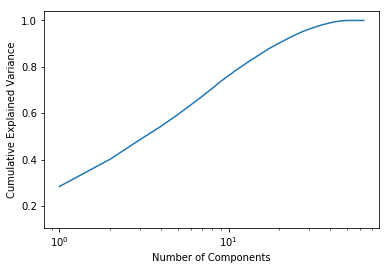

In [19]:
pca = PCA(64).fit(data)
plt.semilogx(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

# K-Means


K Means is an algorithm for unsupervised clustering: that is, finding clusters in data based on the data attributes alone (not the labels).

K Means is a relatively easy-to-understand algorithm. It searches for cluster centers which are the mean of the points within them, such that every point is closest to the cluster center it is assigned to.

Expectation Maximization (EM) procedure which scikit-learn implements, so that KMeans can be solved relatively quickly.

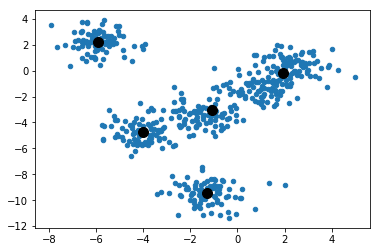

In [107]:
from sklearn.datasets.samples_generator import make_blobs

X, target = make_blobs(n_samples=500, centers=6,
                  random_state=2, cluster_std=0.80)

plt.scatter(X[:, 0], X[:, 1], s = 20);
plt.scatter(estimator.cluster_centers_[:,0], estimator.cluster_centers_[:,1], s = 100,c =  "k")

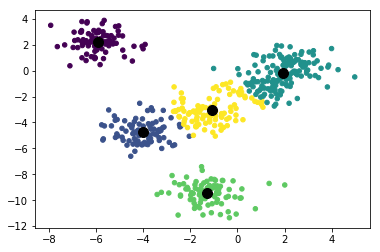

In [108]:
from sklearn.cluster import KMeans
estimator = KMeans(5)  # Find 5 clusters
estimator.fit(X) # Fit Data
predict_y = estimator.predict(X) # Predict Data
plt.scatter(X[:, 0], X[:, 1], c = predict_y, s = 20);
plt.scatter(estimator.cluster_centers_[:,0], estimator.cluster_centers_[:,1], s = 100,c =  "k")

# Kmeans on Digit Datasets

- Using Kmeans to Cluster Data in 64 Dimensions

In [22]:
from sklearn.cluster import KMeans
estimator = KMeans(n_clusters = 10)  # Find 10 Clusters in Data
clusters = estimator.fit_predict(digits.data)
estimator.cluster_centers_.shape
# Shape of Cluter_Centers
# 10 Clusters in 64 Dimensions

(10, 64)

In [23]:
print(clusters)
clusters.shape

[1 3 3 ..., 3 8 8]


(1797,)

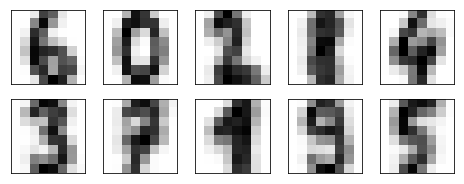

In [24]:
fig = plt.figure(figsize=(8, 3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    # Create 2 by 5 Plot: Leave Axes Empty, 
    ax.imshow(estimator.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)

# Find Clusters Whose Means Are Recognizable Digits


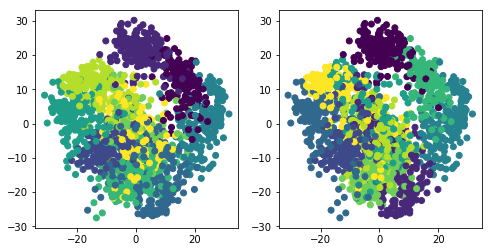

In [100]:
# PCA Visualization and Cluster/K-means Clusters
X = PCA(2).fit_transform(digits.data)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].scatter(X[:, 0], X[:, 1], c = clusters) # Plot of Cluster's Labels (Cluster Centers)

ax[1].scatter(X[:, 0], X[:, 1], c = digits.target); # Plot of Digit's Labels (K-means)

# K-means For Color Compression

Example of Application of Clustering: Color Image Compression
- In most images, a large number of the colors will be unused, and a large number of pixels will have similar or identical colors

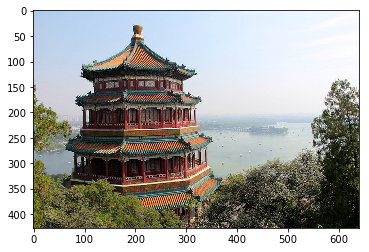

In [26]:
from sklearn.datasets import load_sample_image
img = load_sample_image("china.jpg")
plt.imshow(img);

In [27]:
img.shape

(427, 640, 3)

In [28]:
reshape_img = (img / 255.0).reshape(-1, 3)
print(reshape_img.shape)

# 273280 Points in 3 Dimensions

(273280, 3)


In [29]:
# %matplotlib inline 
# import pylab as pplot
# from sklearn.cluster import KMeans
# # Compress 256^3 Colors Into a Small Number (64 Colors)
# # Find N_color Clusters in Data
# # Create Image Where True Input Color is Replaced by Color of Closest Cluster


# def compress_image(image, n_colors=64):
    
    
#     X = image.reshape(-1, 3) / 255.
#     model = KMeans(n_colors)
#     labels = model.fit_predict(X)
#     colors = model.cluster_centers_
#     new_image = colors[labels].reshape(image.shape)
#     return (255 * new_image).astype(np.uint8)


# new_image = compress_image(reshape_img, 64)
# plt.imshow(new_image)